In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## guia 3 - ej 6


In [2]:
data = pd.read_csv(
    "https://raw.githubusercontent.com/franciscokordon/estainferencia/main/data/blocks.csv"
)

In [3]:
data.head()

,Unnamed: 0,Child,Number,Time,Trial,Shape,Age
0,0,A,11,30.0,1,Cube,4.67
1,1,B,9,19.0,1,Cube,5.00
2,2,C,8,18.6,1,Cube,4.42
3,3,D,9,23.0,1,Cube,4.33
4,4,E,10,29.0,1,Cube,4.33


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   Child       100 non-null    object 
 2   Number      100 non-null    int64  
 3   Time        100 non-null    float64
 4   Trial       100 non-null    int64  
 5   Shape       100 non-null    object 
 6   Age         100 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 5.6+ KB


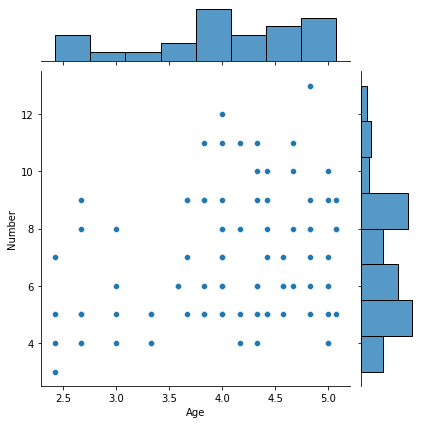

In [5]:
sns.jointplot(x="Age", y="Number", data=data)

Elijo una distribucion Poisson para Y. Con una funcion link eta = ln(mu) = g(mu)

In [6]:
def poisson_log_likelihood(y, mu):  # a menos de una constante
    return np.sum(y * np.log(mu) - mu)


def mle_poisson(beta, X, y):  # ln(mu) = nu = B0  + sum(Bi*Xi)
    mu = np.exp(np.dot(X, beta))
    return -poisson_log_likelihood(y, mu)

In [7]:
from scipy.optimize import minimize

Y = data["Number"]
X = np.column_stack((np.ones(len(data)), data["Age"]))

beta_init = np.zeros(2)

res = minimize(mle_poisson, beta_init, args=(X, Y), method="BFGS")

res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -630.9368538229929
        x: [ 1.345e+00  1.415e-01]
      nit: 9
      jac: [ 7.629e-06  7.629e-06]
 hess_inv: [[ 5.268e-02 -1.253e-02]
            [-1.253e-02  3.062e-03]]
     nfev: 39
     njev: 13

In [8]:
age_linspace = np.linspace(data["Age"].min(), data["Age"].max(), 10)
X_ = np.column_stack((np.ones(len(age_linspace)), age_linspace))
lower_bound, upper_bound = st.poisson.interval(0.95, np.exp(np.dot(X_, res.x)))

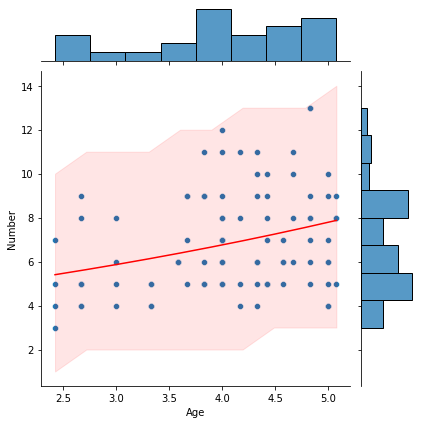

In [9]:
sns.jointplot(x="Age", y="Number", data=data)
plt.plot(age_linspace, np.exp(np.dot(X_, res.x)), color="red")
plt.fill_between(age_linspace, lower_bound, upper_bound, color="red", alpha=0.1)
plt.show()

In [10]:
W = np.diag(np.exp(np.dot(X, res.x)))
fischer_information = np.dot(X.T, np.dot(W, X))
covariance_matrix = np.linalg.inv(fischer_information)
covariance_matrix

array([[ 0.04944115, -0.01169638],
       [-0.01169638,  0.0028516 ]])

In [11]:
standard_errors = np.sqrt(np.diag(covariance_matrix))
standard_errors

array([0.22235366, 0.0534004 ])